In [38]:
import pandas as pd
import numpy as np

# 处理质谱数据

In [39]:
# 读取两种模式质谱数据
data_mz_pos = pd.read_excel('HQ质谱数据-1012.xlsx',sheet_name='HQ-POS',usecols='B:E')
data_mz_neg = pd.read_excel('HQ质谱数据-1012.xlsx',sheet_name='HQ-NEG',usecols='B:E')
data_mz_pos['m/z,rt'] = data_mz_pos['m/z'].apply(lambda x: str(x))+','+data_mz_pos['RT'].apply(lambda x: str(x))
data_mz_neg['m/z,rt'] = data_mz_neg['m/z'].apply(lambda x: str(x))+','+data_mz_neg['RT'].apply(lambda x: str(x))

In [40]:
data_mz_pos

,RT,m/z,area,组分,"m/z,rt"
0,2.333,283.1406,1927552.44,16,"283.1406,2.333"
1,2.333,283.1406,1700149.22,15,"283.1406,2.333"
2,2.333,283.1406,5455438.10,14,"283.1406,2.333"
3,2.333,283.1406,3275642.79,17,"283.1406,2.333"
4,2.333,283.1406,2716619.09,18,"283.1406,2.333"
...,...,...,...,...,...
4745,52.870,614.4836,25350424.42,104,"614.4836,52.87"
4746,52.870,614.4836,26348278.43,105,"614.4836,52.87"
4747,52.870,614.4836,7868859.87,88,"614.4836,52.87"
4748,52.870,614.4836,4337214.46,91,"614.4836,52.87"


In [41]:
# 检查两种模式有无重复mzrt
set_mzrt_pos=set(data_mz_pos['m/z,rt'])
set_mzrt_neg=set(data_mz_neg['m/z,rt'])
print(set_mzrt_pos&set_mzrt_neg)

set()


In [42]:
# 合并质谱数据
data_mzrt = pd.concat([data_mz_pos,data_mz_neg])
data_mzrt

,RT,m/z,area,组分,"m/z,rt"
0,2.3330,283.1406,1927552.44,16,"283.1406,2.333"
1,2.3330,283.1406,1700149.22,15,"283.1406,2.333"
2,2.3330,283.1406,5455438.10,14,"283.1406,2.333"
3,2.3330,283.1406,3275642.79,17,"283.1406,2.333"
4,2.3330,283.1406,2716619.09,18,"283.1406,2.333"
...,...,...,...,...,...
3490,52.9144,293.1812,3678272.61,96,"293.1812,52.9144"
3491,52.9144,293.1812,8486335.20,11,"293.1812,52.9144"
3492,52.9144,293.1812,3882264.57,74,"293.1812,52.9144"
3493,52.9144,293.1812,12409578.78,73,"293.1812,52.9144"


In [43]:
# 删除只有一个组分的mz的函数
def delete_only_one_mz(data_mzrt):
    mzrt_set = pd.Series(list(set(data_mzrt['m/z,rt'])))
    only_one_mz_mask = [len(data_mzrt.loc[data_mzrt['m/z,rt']==mzrt]['组分'])==1 for mzrt in mzrt_set]
    data_mzrt.index = data_mzrt['m/z,rt']
    data = data_mzrt.drop(mzrt_set.loc[only_one_mz_mask])
    data.index = range(0,len(data))
    return data

In [44]:
data_mzrt = delete_only_one_mz(data_mzrt)

# 处理高内涵数据

In [45]:
datac1 = pd.read_excel('HQ高内涵数据-相关性0824版-1010版.xlsx',sheet_name='HQ1-16',index_col=0).iloc[0:6]
datac2 = pd.read_excel('HQ高内涵数据-相关性0824版-1010版.xlsx',sheet_name='HQ17-32-2',index_col=0).iloc[0:6]
datac3 = pd.read_excel('HQ高内涵数据-相关性0824版-1010版.xlsx',sheet_name='HQ33-48',index_col=0).iloc[0:6]
datac4 = pd.read_excel('HQ高内涵数据-相关性0824版-1010版.xlsx',sheet_name='HQ49-64',index_col=0).iloc[0:6]
datac5 = pd.read_excel('HQ高内涵数据-相关性0824版-1010版.xlsx',sheet_name='HQ65-80-2',index_col=0).iloc[0:6]
datac6 = pd.read_excel('HQ高内涵数据-相关性0824版-1010版.xlsx',sheet_name='HQ81-96-2',index_col=0).iloc[0:6]
datac7 = pd.read_excel('HQ高内涵数据-相关性0824版-1010版.xlsx',sheet_name='HQ97-108',index_col=0).iloc[0:6]
datac8 = pd.read_excel('HQ高内涵数据-相关性0824版-1010版.xlsx',sheet_name='HQ51 55 64 102',index_col=0).iloc[0:24]
# 所有sheet的控制组数据
datac = pd.concat([datac1,datac2,datac3,datac4,datac5,datac6,datac7,datac8])

In [46]:
datapa1 = pd.read_excel('HQ高内涵数据-相关性0824版-1010版.xlsx',sheet_name='HQ1-16',index_col=0).iloc[6:12]
datapa2 = pd.read_excel('HQ高内涵数据-相关性0824版-1010版.xlsx',sheet_name='HQ17-32-2',index_col=0).iloc[6:12]
datapa3 = pd.read_excel('HQ高内涵数据-相关性0824版-1010版.xlsx',sheet_name='HQ33-48',index_col=0).iloc[6:12]
datapa4 = pd.read_excel('HQ高内涵数据-相关性0824版-1010版.xlsx',sheet_name='HQ49-64',index_col=0).iloc[6:12]
datapa5 = pd.read_excel('HQ高内涵数据-相关性0824版-1010版.xlsx',sheet_name='HQ65-80-2',index_col=0).iloc[6:12]
datapa6 = pd.read_excel('HQ高内涵数据-相关性0824版-1010版.xlsx',sheet_name='HQ81-96-2',index_col=0).iloc[6:12]
datapa7 = pd.read_excel('HQ高内涵数据-相关性0824版-1010版.xlsx',sheet_name='HQ97-108',index_col=0).iloc[6:12]
datapa8 = pd.read_excel('HQ高内涵数据-相关性0824版-1010版.xlsx',sheet_name='HQ51 55 64 102',index_col=0).iloc[24:48]
# 所有sheet的模型组数据
datapa = pd.concat([datapa1,datapa2,datapa3,datapa4,datapa5,datapa6,datapa7,datapa8])

In [47]:
df1 = pd.DataFrame(datac.mean())
df1.columns = ['c']
df2 = pd.DataFrame(datapa.mean())
df2.columns = ['pa']
df = pd.merge(df1,df2,left_index=True,right_index=True)

In [48]:
# 生成上调参数、下调参数和所有参数列表
up_paras = df.loc[df['pa']<df['c']].index.tolist()
down_paras = df.loc[df['pa']>df['c']].index.tolist()
all_paras = df.index.tolist()

In [49]:
def read_excel(doc,sheet_name,to1=False): 
    data = pd.read_excel(doc,sheet_name=sheet_name,index_col=0)
    data.columns = all_paras
                
    if to1:   # 归一化处理
        data[up_paras] = (data[up_paras]-data[up_paras].min())/(data[up_paras].max()-data[up_paras].min())
        data[down_paras] = (data[down_paras]-data[down_paras].max())/(data[down_paras].max()-data[down_paras].min())
        
    return data

In [50]:
data_high1 = read_excel('HQ高内涵数据-相关性0824版-1010版.xlsx','HQ1-16',to1=1)
data_high2 = read_excel('HQ高内涵数据-相关性0824版-1010版.xlsx','HQ17-32-2',to1=1)
data_high3 = read_excel('HQ高内涵数据-相关性0824版-1010版.xlsx','HQ33-48',to1=1)
data_high4 = read_excel('HQ高内涵数据-相关性0824版-1010版.xlsx','HQ49-64',to1=1)
data_high5 = read_excel('HQ高内涵数据-相关性0824版-1010版.xlsx','HQ65-80-2',to1=1)
data_high6 = read_excel('HQ高内涵数据-相关性0824版-1010版.xlsx','HQ81-96-2',to1=1)
data_high7 = read_excel('HQ高内涵数据-相关性0824版-1010版.xlsx','HQ97-108',to1=1)
data_high8 = read_excel('HQ高内涵数据-相关性0824版-1010版.xlsx','HQ51 55 64 102',to1=1)

In [51]:
# 导出所有归一化数据
datas = [data_high1, data_high2, data_high3, data_high4, data_high5, data_high6, data_high7,data_high8]
sheet_names = ['HQ1-16','HQ17-32-2','HQ33-48','HQ49-64','HQ65-80-2','HQ81-96-2','HQ97-108','HQ51 55 64 102']
writer = pd.ExcelWriter("高内涵数据（归一化）1010.xlsx")
for sheet_name,data in zip(sheet_names,datas):
    data.to_excel(writer,sheet_name=str(sheet_name))

writer.save()

In [52]:
# 整合同一number数据的函数
def avg_data_by_number(data):
    nonnumber_mask = map(lambda x: ('C' in x) or ('PA' in x),data.index)
    avg_data = data.loc[nonnumber_mask]
    nonnumber_length = len(avg_data)
    avg_data_index = list(avg_data.index)
    for i in range(0,(data.shape[0]-nonnumber_length)//3):
        number = data.index[i*3+nonnumber_length].split('-')[0]
        avg_data_index.append(number)
        one_avg_data = pd.DataFrame(data.iloc[i*3+nonnumber_length:(i+1)*3+nonnumber_length,:].mean()).T
        avg_data = pd.concat([avg_data,one_avg_data])
    avg_data.index = avg_data_index
    return avg_data

In [53]:
avg_data_high1 = avg_data_by_number(data_high1)
avg_data_high2 = avg_data_by_number(data_high2)
avg_data_high3 = avg_data_by_number(data_high3)
avg_data_high4 = avg_data_by_number(data_high4)
avg_data_high5 = avg_data_by_number(data_high5)
avg_data_high6 = avg_data_by_number(data_high6)
avg_data_high7 = avg_data_by_number(data_high7)
avg_data_high8 = avg_data_by_number(data_high8)

In [54]:
eight_data = pd.concat([avg_data_high1,avg_data_high2,avg_data_high3,avg_data_high4,
                             avg_data_high5,avg_data_high6,avg_data_high7,avg_data_high8])
number_mask = np.array(list(map(lambda x: 'HQ' in x,eight_data.index)))

# 所有number数据（avg后）
data_high_number = eight_data.loc[number_mask]

In [55]:
data_high_number

,ER1,ER2,ER3,ER4,ER5,ER6,ER7,ER8,ER9,ER10,...,LY38,LY39,LY40,LY41,LY42,LY43,LY44,LY45,LY46,LY47
HQ1,0.636333,-0.217847,0.534972,0.516004,-0.223040,0.340523,0.163390,0.432118,-0.265512,0.518035,...,-0.172665,-0.218072,0.596651,-0.184668,-0.330714,-0.212771,-0.231003,0.176860,-0.334350,-0.207289
HQ2,0.466378,-0.142050,0.583138,0.565549,-0.133042,0.326195,0.246355,0.428659,-0.174725,0.550894,...,-0.258687,-0.400912,0.350278,-0.252818,-0.128659,-0.366221,-0.211482,0.309595,-0.546572,-0.481896
HQ3,0.539547,-0.452879,0.312380,0.315511,-0.451157,0.250908,0.460956,0.339238,-0.632642,0.315056,...,-0.221593,-0.251258,0.604543,-0.241814,-0.364549,-0.239698,-0.265848,0.218612,-0.352158,-0.238443
HQ4,0.348441,-0.157124,0.566151,0.543307,-0.154405,0.317902,0.475489,0.466060,-0.330674,0.534926,...,-0.269682,-0.440750,0.297669,-0.254295,-0.100171,-0.409104,-0.233278,0.330337,-0.621545,-0.552071
HQ5,0.202316,-0.362714,0.424242,0.416487,-0.358826,0.285814,0.732887,0.395596,-0.486192,0.413738,...,-0.326019,-0.418821,0.376974,-0.327334,-0.203518,-0.402630,-0.311156,0.350391,-0.572446,-0.515606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HQ108,0.385468,-0.581682,0.251291,0.267344,-0.554594,0.248217,0.445958,0.217950,-0.550498,0.257052,...,-0.264278,-0.304975,0.343009,-0.274027,-0.253760,-0.365414,-0.281336,0.250323,-0.502562,-0.588277
HQ51,0.760572,-0.129017,0.698549,0.649049,-0.134643,0.480751,0.136218,0.576643,-0.049420,0.653934,...,-0.312547,-0.236041,0.728010,-0.330081,-0.674475,-0.248299,-0.364944,0.297200,-0.231213,-0.256780
HQ55,0.852810,-0.123649,0.756650,0.714325,-0.131509,0.551764,0.095469,0.651095,-0.111054,0.717556,...,-0.290811,-0.390532,0.370866,-0.281670,-0.366236,-0.440775,-0.414121,0.371557,-0.391191,-0.461383
HQ64,0.649177,-0.192668,0.443467,0.410082,-0.185626,0.271532,0.155225,0.347225,-0.087475,0.405127,...,-0.712643,-0.646661,0.331004,-0.725009,-0.514448,-0.735200,-0.781859,0.671799,-0.558919,-0.506390


# 质谱数据与高内涵数据

In [56]:
# 计算各mz的得分的函数
def cal_score_by_mz(data_mzrt,data_high_number):
    mzrt_set = set(data_mzrt['m/z,rt'])
    score_by_mz = []
    for i in mzrt_set:
        number_by_mz = list(map(lambda x:str(x),list(data_mzrt.loc[data_mzrt['m/z,rt']==i]['组分'])))
        HQ_number_by_mz = ['HQ'+str(x) for x in number_by_mz]
        data_per_mz = data_high_number.loc[HQ_number_by_mz].abs().sum()/len(number_by_mz)
        # 合并同一mz的组分的数据（方式：求绝对值平均）
        feature_set = set(map(lambda x:x[0],data_high_number.columns))   # 以第一个字母来区分列类别
        score_per_mz = [data_per_mz.loc[list(map(lambda x:feature in x, data_high_number.columns))].sum()
         for feature in feature_set]   # 合并列参数数据（方式：求和）
        score_by_mz.append(score_per_mz)
    return pd.DataFrame(score_by_mz,index=mzrt_set,columns=feature_set)

In [57]:
# 各mz的得分
score_by_mz = cal_score_by_mz(data_mzrt,data_high_number)
score_by_mz.rename(columns={'E':'ER', 'L':'LY'}, inplace=True)

In [60]:
score_by_mz.to_excel('各mz的活性得分1010.xlsx')

In [61]:
all_data_high = pd.concat([data_high1,
                            data_high2,data_high3,
                            data_high4,data_high5,
                            data_high6,data_high7,
                            data_high8
                            ])
model_mask = map(lambda x: 'PA' in x, all_data_high.index)
control_mask = map(lambda x: 'C' in x, all_data_high.index)
data_high_model = all_data_high.loc[model_mask]   # 所有模型组的数据（前面的数据）
data_high_control = all_data_high.loc[control_mask]   # 所有控制组的数据（前面的数据）
data_high_model.index = ['PA'+str(x) for x in range(len(data_high_model))]
data_high_control.index = ['C'+str(x) for x in range(len(data_high_control))]
data_high_model

,ER1,ER2,ER3,ER4,ER5,ER6,ER7,ER8,ER9,ER10,...,LY38,LY39,LY40,LY41,LY42,LY43,LY44,LY45,LY46,LY47
PA0,0.661660,-0.312058,0.420536,0.406457,-0.313882,0.268170,0.248805,0.395823,-0.514056,0.405058,...,-0.473166,-0.483197,0.333494,-0.484288,-0.270731,-0.504504,-0.512004,0.458497,-0.547153,-0.509857
PA1,0.977564,-0.232526,0.735622,0.746678,-0.253245,0.598892,0.013016,0.730808,-0.447706,0.759276,...,-0.192865,-0.117280,0.761725,-0.229338,-0.495109,-0.138614,-0.284734,0.101853,-0.233814,-0.107424
PA2,0.955675,-0.149922,0.719701,0.715226,-0.167953,0.506893,0.076686,0.714902,-0.520198,0.716674,...,-0.083390,-0.085348,0.728922,-0.109442,-0.421763,-0.096014,-0.178625,0.047653,-0.224257,-0.089549
PA3,1.000000,-0.145784,0.748609,0.752273,-0.167061,0.576642,0.000000,0.721300,-0.419562,0.762102,...,-0.037822,-0.067370,0.738787,-0.064499,-0.392767,-0.054296,-0.111215,0.046982,-0.158233,-0.038932
PA4,0.781657,-0.185576,0.628971,0.619985,-0.193636,0.438467,0.098071,0.566627,-0.360832,0.623472,...,-0.169117,-0.152800,0.678258,-0.194593,-0.407345,-0.168391,-0.254308,0.130050,-0.234089,-0.121180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PA61,0.628699,-0.246641,0.546186,0.527241,-0.248921,0.415353,0.278868,0.521544,-0.356895,0.523042,...,-0.007312,-0.075162,0.726788,-0.046224,-0.549985,-0.076027,0.000000,0.000000,-0.214072,-0.273361
PA62,0.366737,-0.403491,0.391474,0.400579,-0.410371,0.382614,0.570583,0.441417,-0.593718,0.400149,...,-0.101977,0.000000,0.958825,-0.174744,-0.816134,-0.005102,-0.166508,0.048950,0.000000,-0.064269
PA63,0.331830,-0.424448,0.213604,0.217775,-0.421501,0.200421,0.522669,0.227549,-0.470013,0.215853,...,-0.039442,-0.105835,0.812643,-0.059698,-0.661696,-0.064404,-0.106320,0.093130,-0.032020,-0.100543
PA64,0.697143,-0.175184,0.606877,0.581838,-0.176744,0.453170,0.242922,0.552149,-0.286689,0.578681,...,-0.097499,-0.248671,0.513314,-0.086276,-0.397470,-0.234520,-0.171137,0.219527,-0.209160,-0.285013


# 另外将额外的c和pa数据进行归一化

In [62]:
li_sheet_names = ['0713-C-PA-2','0810-C-PA-1','0810-C-PA-2','0810-C-PA-3','0823-C-PA-1',
            '0823-C-PA-2','0823-C-PA-3','0823-C-PA-4','0824-C-PA-1','0824-C-PA-2',
            '0824-C-PA-3','0825-C-PA-1','0825-C-PA-2','0825-C-PA-3','0825-C-PA-4']

for i, s_n in enumerate(li_sheet_names):
    locals()['datac_extra'+str(i+1)]= pd.read_excel('HQ高内涵数据-相关性0824版-1010版.xlsx',sheet_name=s_n,index_col=0).iloc[0:30]

# 额外所有sheet的控制组数据
datac_extra = pd.concat([datac_extra1,datac_extra2,datac_extra3,datac_extra4,
                         datac_extra5,datac_extra6,datac_extra7,datac_extra8,
                         datac_extra9,datac_extra10,datac_extra11,datac_extra12,
                         datac_extra13,datac_extra14,datac_extra15])

In [63]:
for i, s_n in enumerate(li_sheet_names):
    locals()['datapa_extra'+str(i+1)]= pd.read_excel('HQ高内涵数据-相关性0824版-1010版.xlsx',sheet_name=s_n,index_col=0).iloc[30:60]

# 额外所有sheet的模型组数据
datapa_extra = pd.concat([datapa_extra1,datapa_extra2,datapa_extra3,datapa_extra4,
                         datapa_extra5,datapa_extra6,datapa_extra7,datapa_extra8,
                         datapa_extra9,datapa_extra10,datapa_extra11,datapa_extra12,
                         datapa_extra13,datapa_extra14,datapa_extra15])

In [64]:
df_extra1 = pd.DataFrame(datac_extra.mean())
df_extra1.columns = ['c']
df_extra2 = pd.DataFrame(datapa_extra.mean())
df_extra2.columns = ['pa']
df_extra = pd.merge(df_extra1,df_extra2,left_index=True,right_index=True)

In [65]:
# 生成上调参数、下调参数和所有参数列表
up_paras_extra = df_extra.loc[df_extra['pa']<df_extra['c']].index.tolist()
down_paras_extra = df_extra.loc[df_extra['pa']>df_extra['c']].index.tolist()
all_paras_extra = df_extra.index.tolist()

In [66]:
def read_excel_extra(doc,sheet_name,to1=False): 
    data = pd.read_excel(doc,sheet_name=sheet_name,index_col=0)
    data.columns = all_paras_extra
                
    if to1:   # 归一化处理
        data[up_paras_extra] = (data[up_paras_extra]-data[up_paras_extra].min())/(data[up_paras_extra].max()-data[up_paras_extra].min())
        data[down_paras_extra] = (data[down_paras_extra]-data[down_paras_extra].max())/(data[down_paras_extra].max()-data[down_paras_extra].min())
        
    return data

In [67]:
#生成data_nomalize_extra1-15共15个表
for i, s_n in enumerate(li_sheet_names):
    locals()['data_nomalize_extra'+str(i+1)] = read_excel_extra('HQ高内涵数据-相关性0824版-1010版.xlsx',s_n,to1=1)

# 将额外的c和pa归一化数据整合到原数据

In [68]:
all_data_nomalize_extra = pd.concat([data_nomalize_extra1,data_nomalize_extra2,data_nomalize_extra3,
                                     data_nomalize_extra4,data_nomalize_extra5,data_nomalize_extra6,
                                     data_nomalize_extra7,data_nomalize_extra8,data_nomalize_extra9,
                                     data_nomalize_extra10,data_nomalize_extra11,data_nomalize_extra12,
                                     data_nomalize_extra13,data_nomalize_extra14,data_nomalize_extra15,
                                    ])
model_mask_extra = map(lambda x: 'PA' in x, all_data_nomalize_extra.index)
control_mask_extra = map(lambda x: 'C' in x, all_data_nomalize_extra.index)
data_high_model_extra = all_data_nomalize_extra.loc[model_mask_extra]   # 所有额外的模型组的数据
data_high_control_extra = all_data_nomalize_extra.loc[control_mask_extra]   # 所有额外的控制组的数据

#将额外的c和pa归一化数据整合到原数据
data_high_model = pd.concat([data_high_model,data_high_model_extra])
data_high_control = pd.concat([data_high_control,data_high_control_extra])
data_high_model.index = ['PA'+str(x) for x in range(len(data_high_model))]
data_high_control.index = ['C'+str(x) for x in range(len(data_high_control))]
data_high_model

,ER1,ER2,ER3,ER4,ER5,ER6,ER7,ER8,ER9,ER10,...,LY38,LY39,LY40,LY41,LY42,LY43,LY44,LY45,LY46,LY47
PA0,0.661660,-0.312058,0.420536,0.406457,-0.313882,0.268170,0.248805,0.395823,-0.514056,0.405058,...,-0.473166,-0.483197,0.333494,-0.484288,-0.270731,-0.504504,-0.512004,0.458497,-0.547153,-0.509857
PA1,0.977564,-0.232526,0.735622,0.746678,-0.253245,0.598892,0.013016,0.730808,-0.447706,0.759276,...,-0.192865,-0.117280,0.761725,-0.229338,-0.495109,-0.138614,-0.284734,0.101853,-0.233814,-0.107424
PA2,0.955675,-0.149922,0.719701,0.715226,-0.167953,0.506893,0.076686,0.714902,-0.520198,0.716674,...,-0.083390,-0.085348,0.728922,-0.109442,-0.421763,-0.096014,-0.178625,0.047653,-0.224257,-0.089549
PA3,1.000000,-0.145784,0.748609,0.752273,-0.167061,0.576642,0.000000,0.721300,-0.419562,0.762102,...,-0.037822,-0.067370,0.738787,-0.064499,-0.392767,-0.054296,-0.111215,0.046982,-0.158233,-0.038932
PA4,0.781657,-0.185576,0.628971,0.619985,-0.193636,0.438467,0.098071,0.566627,-0.360832,0.623472,...,-0.169117,-0.152800,0.678258,-0.194593,-0.407345,-0.168391,-0.254308,0.130050,-0.234089,-0.121180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PA511,0.525155,-0.423814,0.214992,0.206001,-0.430096,0.179665,-0.559383,0.198696,-0.532006,0.204803,...,0.411092,0.325894,0.193998,0.448426,-0.423176,0.288139,0.326349,-0.410530,0.198706,0.201572
PA512,0.478241,-0.158517,0.477907,0.447116,-0.164814,0.355232,-0.591691,0.408394,-0.202685,0.442523,...,0.682110,0.616814,0.322969,0.711450,-0.425118,0.533595,0.523681,-0.701023,0.416839,0.404032
PA513,0.666378,-0.134290,0.530390,0.499440,-0.142478,0.405027,-0.665499,0.479277,-0.338319,0.494231,...,0.596172,0.433642,0.010000,0.650402,-0.148573,0.355632,0.409350,-0.545974,0.236397,0.143956
PA514,0.614369,0.000000,0.707142,0.663345,0.000000,0.510744,-0.676135,0.610981,-0.174451,0.650493,...,0.528249,0.406579,0.076189,0.572581,-0.146151,0.352824,0.442457,-0.503045,0.266572,0.214505


In [69]:
# 导出所有模型组和控制组归一化数据
data_high_model.to_excel('所有模型组归一化数据1010.xlsx')
data_high_control.to_excel('所有控制组归一化数据1010.xlsx')

In [70]:
feature_set = {'ER','LY','M'}

# 所有模型组的得分
score_model = pd.DataFrame(np.array([data_high_model.loc[:,list(map(lambda x: feature in x, data_high_model.columns))].abs().sum(axis=1) 
                           for feature in feature_set]).T, index=data_high_model.index, columns=feature_set)

# 所有控制组的得分
score_control = pd.DataFrame(np.array([data_high_control.loc[:,list(map(lambda x: feature in x, data_high_control.columns))].abs().sum(axis=1) 
                           for feature in feature_set]).T, index=data_high_control.index, columns=feature_set)

In [71]:
score_model.to_excel('所有模型组得分1010.xlsx')
score_control.to_excel('所有控制组得分1010.xlsx')

In [72]:
# 计算某列得分的z值的函数
def calculate_zscores(data,column): #需运用到全部样本
    zscore = (data[column] - score_control[column].mean())/score_control[column].std()
    return zscore

In [73]:
score_by_mz

,ER,LY,M
"331.1555,48.535",34.208451,15.966708,17.874321
"281.2473,52.1845",39.032715,18.791481,20.322060
"531.1753,11.2482",36.497186,17.454494,19.627875
"311.2265,49.1086666666667",33.114211,18.058685,20.878654
"702.5366,52.7026666666667",34.550567,23.553623,19.574899
...,...,...,...
"287.0599,30.1575",36.716567,18.852426,21.457379
"506.1862,9.5506",37.753092,17.414704,21.156383
"419.1345,10.371",40.258536,19.569272,20.946109
"301.0714,30.585",37.792006,18.882406,21.538722


In [74]:
# mz、模型组、控制组的ER得分的z值
zscore_mz_ER = calculate_zscores(score_by_mz,'ER')
zscore_model_ER = calculate_zscores(score_model,'ER')
zscore_control_ER = calculate_zscores(score_control,'ER')

# mz、模型组、控制组的M得分的z值
zscore_mz_M = calculate_zscores(score_by_mz,'M')
zscore_model_M = calculate_zscores(score_model,'M')
zscore_control_M = calculate_zscores(score_control,'M')

# mz、模型组、控制组的LY得分的z值
zscore_mz_LY = calculate_zscores(score_by_mz,'LY')
zscore_model_LY = calculate_zscores(score_model,'LY')
zscore_control_LY = calculate_zscores(score_control,'LY')

In [75]:
zscore_mz_ER

331.1555,48.535             -3.585659
281.2473,52.1845            -2.397075
531.1753,11.2482            -3.021769
311.2265,49.1086666666667   -3.855254
702.5366,52.7026666666667   -3.501370
                               ...   
287.0599,30.1575            -2.967718
506.1862,9.5506             -2.712343
419.1345,10.371             -2.095061
301.0714,30.585             -2.702756
452.1766,4.1575             -2.798897
Name: ER, Length: 1046, dtype: float64

In [76]:
writer1 = pd.ExcelWriter('ER得分的z值1010.xlsx')
zscore_mz_ER.to_excel(writer1,sheet_name='ER_mz组')
zscore_model_ER.to_excel(writer1,sheet_name='ER_模型组')
zscore_control_ER.to_excel(writer1,sheet_name='ER_控制组')
writer1.save()

writer2 = pd.ExcelWriter('M得分的z值1010.xlsx')
zscore_mz_M.to_excel(writer2,sheet_name='M_mz组')
zscore_model_M.to_excel(writer2,sheet_name='M_模型组')
zscore_control_M.to_excel(writer2,sheet_name='M_控制组')
writer2.save()

writer3 = pd.ExcelWriter('LY得分的z值1010.xlsx')
zscore_mz_LY.to_excel(writer3,sheet_name='LY_mz组')
zscore_model_LY.to_excel(writer3,sheet_name='LY_模型组')
zscore_control_LY.to_excel(writer3,sheet_name='LY_控制组')
writer3.save()

In [77]:
import matplotlib.pyplot as plt
from scipy.stats import norm
def plot_hist(datas,labels,title,label_loc,q=0.95):   # q的默认值为0.95
    plt.figure(figsize=(6,4))
    colors1 = ['#4682B4','#FFA500','forestgreen']
    colors2 = ['b','y','g']
    threshold = datas[1].quantile(q=1-q)
    maximum = 0
    span = datas[1].max() - datas[1].min()
    for i,data_label in enumerate(zip(datas,labels)):
        data = data_label[0]
        label = data_label[1]
        n, bins, patches = plt.hist(data,density=True,label=label,
                                    alpha=0.8,bins=20,color=colors1[i])
        y = norm.pdf(bins, data.mean(), data.std())
        if n.max()>maximum:
            maximum = n.max()
        plt.plot(bins, y, colors2[i]+'--')
    median_mz = datas[0].median()
    #plt.plot([median_mz,median_mz],[0,maximum],'k--',linewidth=2)
    #plt.arrow(threshold-span*0.05,maximum/1.5,-span*0.1,0,width=maximum*0.04,head_length=span*0.05,fc='steelblue',ec='steelblue')
    plt.xlabel('$z\ scores$',fontsize=14)
    plt.ylabel('$frequncy$',fontsize=14)
    plt.title(title,fontsize=14)
    plt.legend(loc=label_loc,fontsize=14)
    plt.tight_layout()

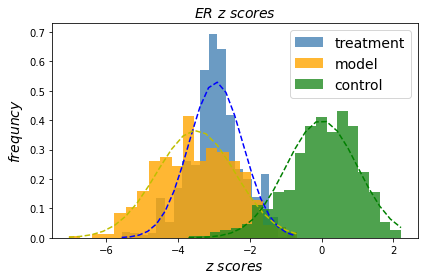

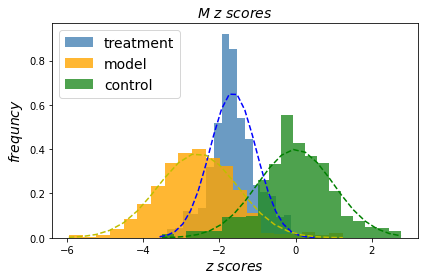

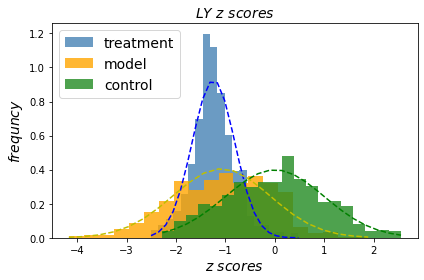

In [78]:
plot_hist([zscore_mz_ER,zscore_model_ER,zscore_control_ER],
          ['treatment','model','control'],
          '$ER\ z\ scores$','upper right',q=0.75)
plt.savefig('ER活性分数累积分布.png',dpi=300)

plot_hist([zscore_mz_M,zscore_model_M,zscore_control_M],
          ['treatment','model','control']
          ,'$M\ z\ scores$','upper left',q=0.75)
plt.savefig('M活性分数累积分布.png',dpi=300)

plot_hist([zscore_mz_LY,zscore_model_LY,zscore_control_LY],
          ['treatment','model','control']
          ,'$LY\ z\ scores$','upper left',q=0.75)
plt.savefig('LY活性分数累积分布.png',dpi=300)

In [79]:
# 根据质谱数据和number的数据计算簇值的函数
def cal_cluster_score(data_mzrt,data_high_number):
    mzrt_set = set(data_mzrt['m/z,rt'])
    number_matrix_by_mzrt = [map(lambda x:'HQ'+str(x),list(data_mzrt.loc[data_mzrt['m/z,rt']==mzrt]['组分'])) 
                             for mzrt in mzrt_set]
    cluster_score_list = []
    for number_list in number_matrix_by_mzrt:
        corr_matrix = data_high_number.loc[number_list].T.corr()
        j = len(corr_matrix)
        if j != 1:
            cluster_score = (corr_matrix.apply(lambda x:x**3).sum().sum()-j)/(j**2-j)
            cluster_score_list.append(cluster_score)
        else:
            cluster_score = 1
            cluster_score_list.append(cluster_score)
    return pd.DataFrame(cluster_score_list,index=mzrt_set,columns=['cluster_score'])

In [80]:
cluster_score_matrix = cal_cluster_score(data_mzrt,data_high_number)   # 各mz的簇值

In [81]:
cluster_score_matrix.to_excel('mz簇值1012.xlsx')

In [82]:
from scipy.optimize import curve_fit

In [84]:
# 画散点图的函数
def plot_scatter_curve(datas,threshold,title):
    data = datas[0]
    cutoff = datas[0].median()   #datas[1].quantile(q=threshold)   # 蓝色横线的值cutoff
    plt.figure(figsize=(10,4))
    plt.suptitle(title,fontsize=18)
    grid = plt.GridSpec(1,3,wspace=0.5,hspace=0.5)
    ax = plt.subplot(grid[0,0:2])
    plt.plot(np.arange(len(data)),data,'k.',markersize=7,alpha=0.8)   # 画散点
    plt.plot([0,len(data)],[cutoff,cutoff],color='steelblue',linewidth=3)   # 画蓝色的线
    plt.axis([0,1.1*len(data),data.min()-3*data.std(),data.max()+3*data.std()])
    for i in ['top','right']:
        ax.spines[i].set_visible(False)
    #plt.text(len(data)/2,data.max()-1*data.std(),'Hits',fontsize=20,
    #         verticalalignment='center',horizontalalignment='center',color='darkorange')
    plt.arrow(1.05*len(data),cutoff+0.5,0,2*data.std(),width=15,head_length=data.std(),fc='steelblue',ec='steelblue')
    plt.arrow(1.05*len(data),cutoff,0,-2*data.std(),width=15,head_length=data.std(),fc='darkorange',ec='darkorange')
    plt.xlabel('Compounds',fontsize=14)
    plt.ylabel('robust Z-scores',fontsize=14)

    ax = plt.subplot(grid[0,2])
    sort_data = np.sort(data)
    mu1,sigma1 = curve_fit(norm.cdf, sort_data, np.arange(len(data))/len(data),p0=[0,1])[0]
    t = np.linspace(sort_data[0],sort_data[-1],len(data))
    y = norm.cdf(t, mu1, sigma1)
    plt.plot(sort_data, y*len(data),color='steelblue')
    ax.yaxis.set_label_position("right")
    ax.yaxis.tick_right()
    for i in ['top','left']:
        ax.spines[i].set_visible(False)
    plt.xlabel('Robust Z-score',fontsize=14)
    plt.ylabel('Values',fontsize=14)
    plt.step(sort_data,np.arange(len(data))+1,'k-',linewidth=3.5,alpha=0.8)
    plt.axis([data.min(),data.max(),0,len(data)])

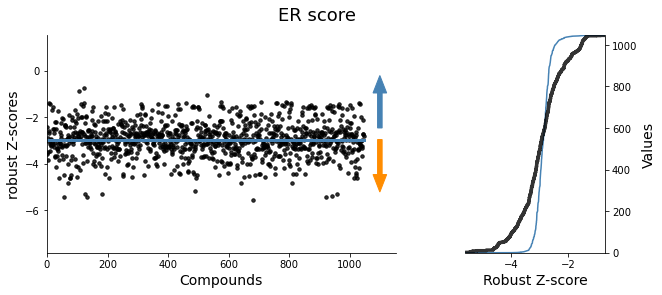

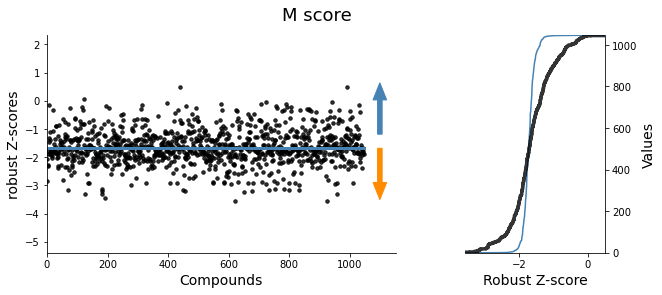

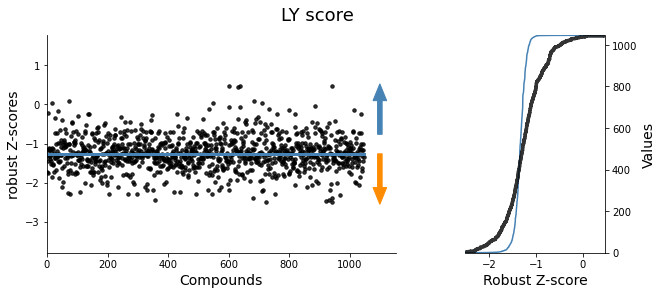

In [85]:
plot_scatter_curve([zscore_mz_ER,zscore_model_ER],0.75,'ER score')
plt.savefig('ERscore散点图.png', dpi=300)

plot_scatter_curve([zscore_mz_M,zscore_model_M],0.75,'M score')
plt.savefig('Mscore散点图.png', dpi=300)

plot_scatter_curve([zscore_mz_LY,zscore_model_LY],0.75,'LY score')
plt.savefig('LYscore散点图.png', dpi=300)

In [86]:
# 寻找z值大于cutoff的hits的函数
def find_hits(zscore_datas,threshold):
    zscore_data = zscore_datas[0]
    return zscore_data.loc[zscore_data>=zscore_datas[0].median()]

In [87]:
ER_hits = find_hits([zscore_mz_ER,zscore_model_ER],0.75)
M_hits = find_hits([zscore_mz_M,zscore_model_M],0.75)
LY_hits = find_hits([zscore_mz_LY,zscore_model_LY],0.75)
cluster_hits_7 = cluster_score_matrix.query('cluster_score >= 0.7')
LY_hits

281.2473,52.1845            -1.173973
702.5366,52.7026666666667   -0.228162
686.2684,25.021             -1.138534
285.0768,21.7246904761905   -1.126969
287.0568,16.7188823529412   -1.156825
                               ...   
889.1541,29.899             -1.022933
483.2751,50.6035            -0.234648
287.0599,30.1575            -1.161869
419.1345,10.371             -1.019496
301.0714,30.585             -1.155915
Name: LY, Length: 523, dtype: float64

In [88]:
# 把簇值添加到hits表格
ER_hits = pd.merge(pd.DataFrame(ER_hits),cluster_score_matrix,left_index=True,right_index=True,how='left')
M_hits = pd.merge(pd.DataFrame(M_hits),cluster_score_matrix,left_index=True,right_index=True,how='left')
LY_hits = pd.merge(pd.DataFrame(LY_hits),cluster_score_matrix,left_index=True,right_index=True,how='left')

In [89]:
# 导出hits表格
for hits,filename in zip([ER_hits, M_hits,LY_hits],
                               ['ER hits','M hits','LY hits']):
    hits.to_excel(filename+'.xlsx')

In [90]:
from matplotlib.pyplot import subplots
import venn

C:\Users\Janna\AppData\Local\Temp/ipykernel_25372/3980571536.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


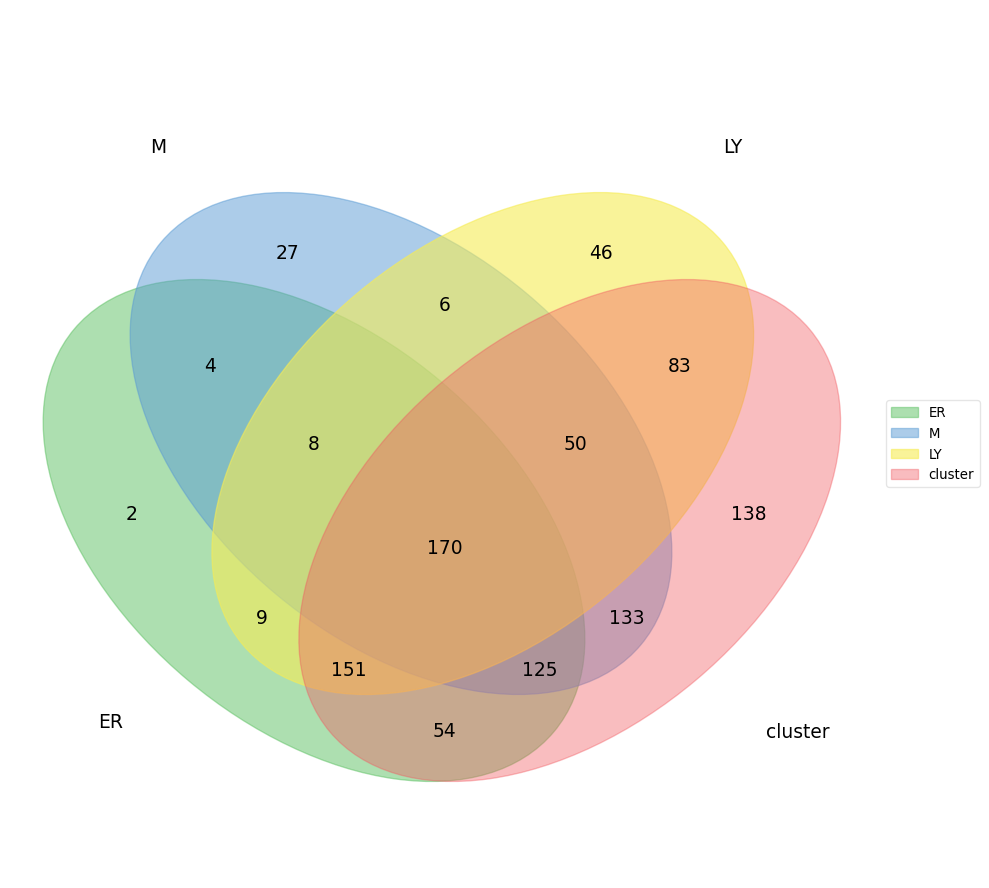

In [91]:
labels = venn.get_labels([set(ER_hits.index), set(M_hits.index), set(LY_hits.index), set(cluster_hits_7.index)])
fig, ax = venn.venn4(labels, names=['ER', 'M', 'LY', 'cluster'])
fig.show()
plt.savefig('all venn(0.7).png',bbox_inches = 'tight',dpi=300)

C:\Users\Janna\AppData\Local\Temp/ipykernel_25372/3989678583.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


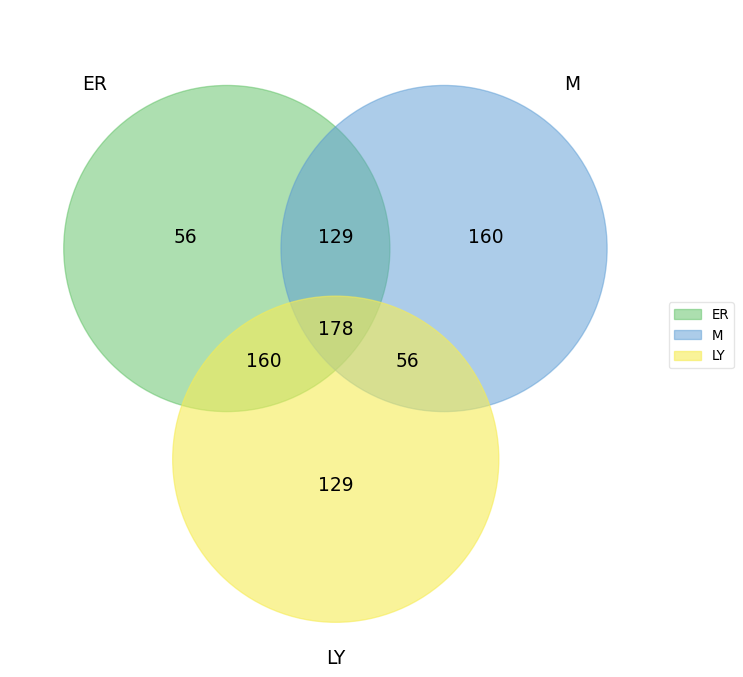

In [92]:
labels = venn.get_labels([set(ER_hits.index),set(M_hits.index),set(LY_hits.index)])
fig, ax = venn.venn3(labels, names=['ER', 'M','LY'])
fig.show()
plt.savefig('ER&M&LY venn.png',bbox_inches = 'tight',dpi=300)

C:\Users\Janna\AppData\Local\Temp/ipykernel_25372/2430371928.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


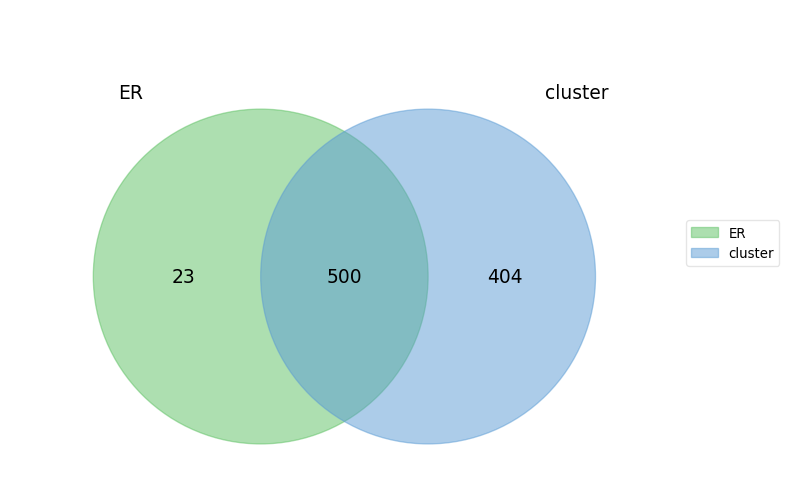

In [93]:
labels = venn.get_labels([set(ER_hits.index),set(cluster_hits_7.index)])
fig, ax = venn.venn2(labels, names=['ER', 'cluster'],legend_loc="upper left")
fig.show()
plt.savefig('ER venn(0.7).png',bbox_inches = 'tight',dpi=300)

C:\Users\Janna\AppData\Local\Temp/ipykernel_25372/2278995045.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


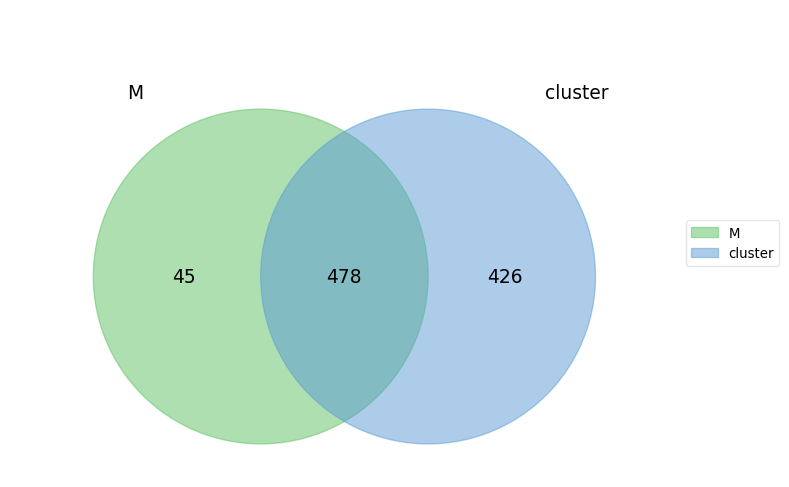

In [94]:
labels = venn.get_labels([set(M_hits.index),set(cluster_hits_7.index)])
fig, ax = venn.venn2(labels, names=['M', 'cluster'],legend_loc="upper left")
fig.show()
plt.savefig('M venn(0.7).png',bbox_inches = 'tight',dpi=300)

C:\Users\Janna\AppData\Local\Temp/ipykernel_25372/1701241335.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


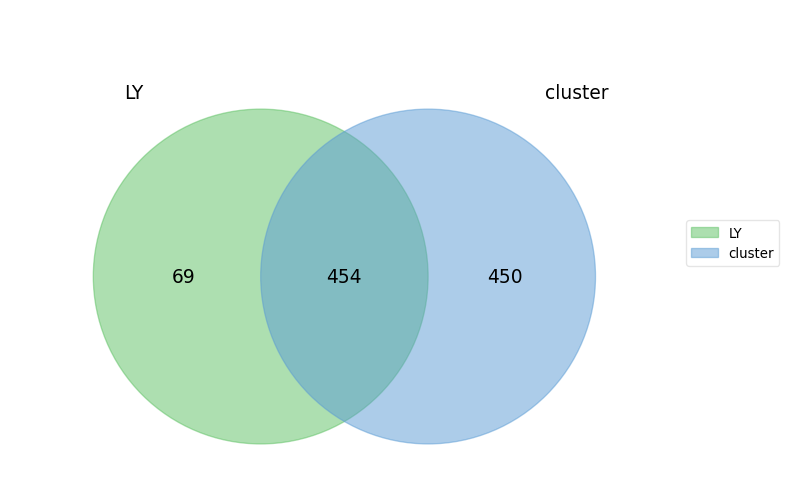

In [95]:
labels = venn.get_labels([set(LY_hits.index),set(cluster_hits_7.index)])
fig, ax = venn.venn2(labels, names=['LY', 'cluster'],legend_loc="upper left")
fig.show()
plt.savefig('LY venn(0.7).png',bbox_inches = 'tight',dpi=300)

In [96]:
set_ER_cluster = set(ER_hits.index) & set(cluster_hits_7.index)
set_ER_cluster = pd.DataFrame(set_ER_cluster)

set_M_cluster = set(M_hits.index) & set(cluster_hits_7.index)
set_M_cluster = pd.DataFrame(set_M_cluster)

set_LY_cluster = set(LY_hits.index) & set(cluster_hits_7.index)
set_LY_cluster = pd.DataFrame(set_LY_cluster)

In [97]:
writer = pd.ExcelWriter('cluster交集.xlsx')
set_ER_cluster.to_excel(writer,sheet_name='ER')
set_M_cluster.to_excel(writer,sheet_name='M')
set_LY_cluster.to_excel(writer,sheet_name='LY')
writer.save()